In [210]:
#Read the table of earthquakes from https://en.wikipedia.org/wiki/List_of_deadly_earthquakes_since_1900 using *beautifulsoup* and load to a pandas dataframe.

#Data cleaning tasks include:
#1. Replace empty strings with NaN
#2. Remove the footnotes from the 'Other Source Deaths' column
#3. Convert Magnitude to a numeric
#4. Create a new column ('deaths') that evaluates the four total-death columns ('PDE Total Deaths', 'Utsu Total Deaths', 'EM-DAT Total Deaths', and 'Other Source Deaths') and populates the new column with the highest value.
#5. Explore the data in terms of when and where earthquakes occurred and how severe they were (magnitude, deaths, secondary effects).

#Feel free to add data after 9/23/2011, but understand that it is not required.
#Add any supplemental data you'd like in order to explore ideas related to earthquake occurrence and effects.
#hi 

In [211]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
% matplotlib inline

In [212]:
from bs4 import BeautifulSoup as BS
import urllib.request
import pandas as pd
import numpy as np

In [213]:
request = urllib.request.Request('https://en.wikipedia.org/wiki/List_of_deadly_earthquakes_since_1900')

In [214]:
result = urllib.request.urlopen(request)
resulttext = result.read()
earthquakesoup = BS(resulttext, 'html.parser')
earthquakesoup

<!DOCTYPE html>

<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of deadly earthquakes since 1900 - Wikipedia</title>
<script>document.documentElement.className = document.documentElement.className.replace( /(^|\s)client-nojs(\s|$)/, "$1client-js$2" );</script>
<script>(window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"List_of_deadly_earthquakes_since_1900","wgTitle":"List of deadly earthquakes since 1900","wgCurRevisionId":810533305,"wgRevisionId":810533305,"wgArticleId":11673441,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles needing additional references from July 2017","All articles needing additional references","Articles needing cleanup from July 2017","All pages needing cleanup","Cleanup tagged articles with a reason field from July 2017","Wikipedia pages needi

In [215]:
print(earthquakesoup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of deadly earthquakes since 1900 - Wikipedia
  </title>
  <script>
   document.documentElement.className = document.documentElement.className.replace( /(^|\s)client-nojs(\s|$)/, "$1client-js$2" );
  </script>
  <script>
   (window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"List_of_deadly_earthquakes_since_1900","wgTitle":"List of deadly earthquakes since 1900","wgCurRevisionId":810533305,"wgRevisionId":810533305,"wgArticleId":11673441,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles needing additional references from July 2017","All articles needing additional references","Articles needing cleanup from July 2017","All pages needing cleanup","Cleanup tagged articles with a reason field from July 20

In [216]:
earthquakesoup.title

<title>List of deadly earthquakes since 1900 - Wikipedia</title>

In [217]:
len(earthquakesoup.find_all('table'))

6

In [218]:
earthquakesoup.table.title

In [219]:
len(earthquakesoup.find_all('table', class_="sortable wikitable"))

1

In [220]:
earthquakesoup.find_all('table', class_="sortable wikitable")

[<table class="sortable wikitable">
 <tr bgcolor="#CCCCCC">
 <th width="22%">Origin (<a class="mw-redirect" href="/wiki/UTC" title="UTC">UTC</a>)</th>
 <th width="33%">Present-day country and link to Wikipedia article</th>
 <th width="10%"><a href="/wiki/Latitude" title="Latitude">Lat</a></th>
 <th width="10%"><a href="/wiki/Longitude" title="Longitude">Long</a></th>
 <th width="8%">Depth (<a class="mw-redirect" href="/wiki/Km" title="Km">km</a>)</th>
 <th width="6%">Magnitude</th>
 <th width="9%">Secondary Effects</th>
 <th width="10%">PDE Shaking Deaths</th>
 <th width="10%">PDE Total Deaths</th>
 <th width="10%">Utsu Total Deaths</th>
 <th width="10%">EM-DAT Total Deaths</th>
 <th width="12%">Other Source Deaths</th>
 </tr>
 <tr>
 <td>1900-05-11 17:23</td>
 <td>Japan</td>
 <td>38.700</td>
 <td>141.100</td>
 <td>5</td>
 <td>7.0 <a class="mw-redirect" href="/wiki/Seismic_scale#Mjma" title="Seismic scale"><span title="JMA mag.">M<sub>JMA</sub></span></a></td>
 <td></td>
 <td></td>
 <td

In [221]:
table1 = earthquakesoup.find_all('table', class_=['sortable', 'wikitable', 'jquery-tablesorter'])
#table1
type(table1)
#len(table1)

bs4.element.ResultSet

In [222]:
#convert the "Set" to "Tag" to be able to access the elemnts in the table
table2 = table1[0]
type(table2)

bs4.element.Tag

In [223]:
#find specific elemnts with a specific Tags <th>, <td> etc
table_header = table2.find_all("th")
type(table_header)

bs4.element.ResultSet

In [224]:
#so we have a lot of information with the th as the text, color width we just need the text so we are going to get rid of all 
#except the text
#list comprehension
header = [th.text for th in table_header]
type(header)

list

In [225]:
print(header)

['Origin (UTC)', 'Present-day country and link to Wikipedia article', 'Lat', 'Long', 'Depth (km)', 'Magnitude', 'Secondary Effects', 'PDE Shaking Deaths', 'PDE Total Deaths', 'Utsu Total Deaths', 'EM-DAT Total Deaths', 'Other Source Deaths']


In [226]:
#we want to pull the data <td> for each rows which are separated by ,<tr> so we can not do like the th 
#so we will do loop in loop
#and convert each to a list
rows = []
for tr in table2.find_all("tr")[1:]:
    table_rows = [td.text for td in tr.find_all("td")]
    rows.append(table_rows)

In [227]:
type(rows)

list

In [228]:
len(rows) 
#how many rows

1340

In [229]:
#now there are two list one header and one for the rows so we need to put them together
#convert it to dataframe
#rows are data and the column are assigned under the header
earthquakes = pd.DataFrame(rows, columns = header)
earthquakes

,Origin (UTC),Present-day country and link to Wikipedia article,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths
0,1900-05-11 17:23,Japan,38.700,141.100,5,7.0 MJMA,,,,,,
1,1900-07-12 06:25,Turkey,40.300,43.100,,5.9 Muk,,,,140,,
2,1900-10-29 09:11,Venezuela,11.000,-66.000,0,7.7 Mw,,,,,,
3,1901-02-15 00:00,China,26.000,100.100,0,6.5 Ms,,,,,,
4,1901-03-31 07:11,Bulgaria,43.400,28.700,,6.4 Muk,,,,4,,
5,1901-08-09 09:23,Japan,40.500,142.500,35,7.2 Mw,T,,,,,
6,1901-11-15 20:15,New Zealand (see 1901 Cheviot earthquake),-43.000,173.000,0,6.8 Ms,,,,1,,
7,1902-01-30 14:01,Japan,40.500,141.300,35,6.9 Ms,,,,1,,
8,1902-02-13 09:39,Azerbaijan,40.700,48.600,15,6.9 Muk,,,,86,,
9,1902-03-09 07:46,Turkey,40.700,33.600,,5.5 Muk,,,,4,,


In [230]:
earthquakes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 12 columns):
Origin (UTC)                                         1340 non-null object
Present-day country and link to Wikipedia article    1340 non-null object
Lat                                                  1340 non-null object
Long                                                 1340 non-null object
Depth (km)                                           1340 non-null object
Magnitude                                            1340 non-null object
Secondary Effects                                    1340 non-null object
PDE Shaking Deaths                                   1340 non-null object
PDE Total Deaths                                     1340 non-null object
Utsu Total Deaths                                    1340 non-null object
EM-DAT Total Deaths                                  1340 non-null object
Other Source Deaths                                  1338 non-null object
dtype

In [231]:
#replace the empty string with naN
#df.replace(r'\s+',np.nan,regex=True)
#replace 
earthquakes.replace("",np.nan,inplace=True) 
earthquakes

,Origin (UTC),Present-day country and link to Wikipedia article,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths
0,1900-05-11 17:23,Japan,38.700,141.100,5,7.0 MJMA,NaN,NaN,NaN,NaN,NaN,NaN
1,1900-07-12 06:25,Turkey,40.300,43.100,NaN,5.9 Muk,NaN,NaN,NaN,140,NaN,NaN
2,1900-10-29 09:11,Venezuela,11.000,-66.000,0,7.7 Mw,NaN,NaN,NaN,NaN,NaN,NaN
3,1901-02-15 00:00,China,26.000,100.100,0,6.5 Ms,NaN,NaN,NaN,NaN,NaN,NaN
4,1901-03-31 07:11,Bulgaria,43.400,28.700,NaN,6.4 Muk,NaN,NaN,NaN,4,NaN,NaN
5,1901-08-09 09:23,Japan,40.500,142.500,35,7.2 Mw,T,NaN,NaN,NaN,NaN,NaN
6,1901-11-15 20:15,New Zealand (see 1901 Cheviot earthquake),-43.000,173.000,0,6.8 Ms,NaN,NaN,NaN,1,NaN,NaN
7,1902-01-30 14:01,Japan,40.500,141.300,35,6.9 Ms,NaN,NaN,NaN,1,NaN,NaN
8,1902-02-13 09:39,Azerbaijan,40.700,48.600,15,6.9 Muk,NaN,NaN,NaN,86,NaN,NaN
9,1902-03-09 07:46,Turkey,40.700,33.600,NaN,5.5 Muk,NaN,NaN,NaN,4,NaN,NaN


In [232]:
#earthquakes[['Secondary Effects', 'PDE Shaking Deaths', 'PDE Total Deaths', 'Utsu Total Deaths', 'EM-DAT Total Deaths',
#'Other Source Deaths']].replace(r'\s+',np.nan,regex=True, inplace=True)

In [233]:
earthquakes['Other Source Deaths'].value_counts()

1                                      3
222,517[17]                            1
33[8]                                  1
8000+                                  1
231000*[13] 283000*[14] 227898*[15]    1
1500[6]                                1
42                                     1
3500                                   1
150+                                   1
380                                    1
120                                    1
45000[9]                               1
1,115                                  1
2,698                                  1
189                                    1
164[6]                                 1
105000                                 1
41                                     1
60[16]                                 1
34                                     1
26271[11] 26000[12]                    1
2489[10]                               1
1404                                   1
601 (as of October 30, 2011)           1
46              

In [234]:
#df.replace(r'\s+',np.nan,regex=True) 

earthquakes[earthquakes['Other Source Deaths'].str.contains('231000', na=True)]

,Origin (UTC),Present-day country and link to Wikipedia article,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths
0,1900-05-11 17:23,Japan,38.700,141.100,5,7.0 MJMA,NaN,NaN,NaN,NaN,NaN,NaN
1,1900-07-12 06:25,Turkey,40.300,43.100,NaN,5.9 Muk,NaN,NaN,NaN,140,NaN,NaN
2,1900-10-29 09:11,Venezuela,11.000,-66.000,0,7.7 Mw,NaN,NaN,NaN,NaN,NaN,NaN
3,1901-02-15 00:00,China,26.000,100.100,0,6.5 Ms,NaN,NaN,NaN,NaN,NaN,NaN
4,1901-03-31 07:11,Bulgaria,43.400,28.700,NaN,6.4 Muk,NaN,NaN,NaN,4,NaN,NaN
5,1901-08-09 09:23,Japan,40.500,142.500,35,7.2 Mw,T,NaN,NaN,NaN,NaN,NaN
6,1901-11-15 20:15,New Zealand (see 1901 Cheviot earthquake),-43.000,173.000,0,6.8 Ms,NaN,NaN,NaN,1,NaN,NaN
7,1902-01-30 14:01,Japan,40.500,141.300,35,6.9 Ms,NaN,NaN,NaN,1,NaN,NaN
8,1902-02-13 09:39,Azerbaijan,40.700,48.600,15,6.9 Muk,NaN,NaN,NaN,86,NaN,NaN
9,1902-03-09 07:46,Turkey,40.700,33.600,NaN,5.5 Muk,NaN,NaN,NaN,4,NaN,NaN


In [235]:
#df.replace(r'\s+',np.nan,regex=True) 

earthquakes[earthquakes['Other Source Deaths'].str.contains('231000', na=False)]

,Origin (UTC),Present-day country and link to Wikipedia article,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths
1238,2004-12-26 00:58,Indonesia (see 2004 Indian Ocean earthquake),3.287,95.972,30,9.1 Mw,"T,L",NaN,297200,NaN,NaN,231000*[13] 283000*[14] 227898*[15]


In [236]:
earthquakes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 12 columns):
Origin (UTC)                                         1340 non-null object
Present-day country and link to Wikipedia article    1340 non-null object
Lat                                                  1326 non-null object
Long                                                 1326 non-null object
Depth (km)                                           1250 non-null object
Magnitude                                            1339 non-null object
Secondary Effects                                    373 non-null object
PDE Shaking Deaths                                   739 non-null object
PDE Total Deaths                                     750 non-null object
Utsu Total Deaths                                    1027 non-null object
EM-DAT Total Deaths                                  560 non-null object
Other Source Deaths                                  37 non-null object
dtypes: obj

In [237]:
#df['column'] = df['column'].replace(np.nan, 0)
earthquakes['PDE Total Deaths'] = earthquakes['PDE Total Deaths'].replace(np.nan, 0)

In [238]:
earthquakes

,Origin (UTC),Present-day country and link to Wikipedia article,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths
0,1900-05-11 17:23,Japan,38.700,141.100,5,7.0 MJMA,NaN,NaN,0,NaN,NaN,NaN
1,1900-07-12 06:25,Turkey,40.300,43.100,NaN,5.9 Muk,NaN,NaN,0,140,NaN,NaN
2,1900-10-29 09:11,Venezuela,11.000,-66.000,0,7.7 Mw,NaN,NaN,0,NaN,NaN,NaN
3,1901-02-15 00:00,China,26.000,100.100,0,6.5 Ms,NaN,NaN,0,NaN,NaN,NaN
4,1901-03-31 07:11,Bulgaria,43.400,28.700,NaN,6.4 Muk,NaN,NaN,0,4,NaN,NaN
5,1901-08-09 09:23,Japan,40.500,142.500,35,7.2 Mw,T,NaN,0,NaN,NaN,NaN
6,1901-11-15 20:15,New Zealand (see 1901 Cheviot earthquake),-43.000,173.000,0,6.8 Ms,NaN,NaN,0,1,NaN,NaN
7,1902-01-30 14:01,Japan,40.500,141.300,35,6.9 Ms,NaN,NaN,0,1,NaN,NaN
8,1902-02-13 09:39,Azerbaijan,40.700,48.600,15,6.9 Muk,NaN,NaN,0,86,NaN,NaN
9,1902-03-09 07:46,Turkey,40.700,33.600,NaN,5.5 Muk,NaN,NaN,0,4,NaN,NaN


In [239]:
earthquakes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 12 columns):
Origin (UTC)                                         1340 non-null object
Present-day country and link to Wikipedia article    1340 non-null object
Lat                                                  1326 non-null object
Long                                                 1326 non-null object
Depth (km)                                           1250 non-null object
Magnitude                                            1339 non-null object
Secondary Effects                                    373 non-null object
PDE Shaking Deaths                                   739 non-null object
PDE Total Deaths                                     1340 non-null object
Utsu Total Deaths                                    1027 non-null object
EM-DAT Total Deaths                                  560 non-null object
Other Source Deaths                                  37 non-null object
dtypes: ob

In [240]:
earthquakes['PDE Total Deaths'] = pd.to_numeric(earthquakes['PDE Total Deaths'])

In [241]:
earthquakes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 12 columns):
Origin (UTC)                                         1340 non-null object
Present-day country and link to Wikipedia article    1340 non-null object
Lat                                                  1326 non-null object
Long                                                 1326 non-null object
Depth (km)                                           1250 non-null object
Magnitude                                            1339 non-null object
Secondary Effects                                    373 non-null object
PDE Shaking Deaths                                   739 non-null object
PDE Total Deaths                                     1340 non-null int64
Utsu Total Deaths                                    1027 non-null object
EM-DAT Total Deaths                                  560 non-null object
Other Source Deaths                                  37 non-null object
dtypes: int

In [242]:
#'PDE Total Deaths', 'Utsu Total Deaths', 'EM-DAT Total Deaths', and 'Other Source Deaths'
#df['column'] = df['column'].replace(np.nan, 0)
earthquakes['Utsu Total Deaths'] = earthquakes['Utsu Total Deaths'].replace(np.nan, 0)
earthquakes['PDE Shaking Deaths'] = earthquakes['PDE Shaking Deaths'].replace(np.nan, 0)
earthquakes['EM-DAT Total Deaths'] = earthquakes['EM-DAT Total Deaths'].replace(np.nan, 0)
earthquakes['Other Source Deaths'] = earthquakes['Other Source Deaths'].replace(np.nan, 0)

In [243]:
earthquakes

,Origin (UTC),Present-day country and link to Wikipedia article,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths
0,1900-05-11 17:23,Japan,38.700,141.100,5,7.0 MJMA,NaN,0,0,0,0,0
1,1900-07-12 06:25,Turkey,40.300,43.100,NaN,5.9 Muk,NaN,0,0,140,0,0
2,1900-10-29 09:11,Venezuela,11.000,-66.000,0,7.7 Mw,NaN,0,0,0,0,0
3,1901-02-15 00:00,China,26.000,100.100,0,6.5 Ms,NaN,0,0,0,0,0
4,1901-03-31 07:11,Bulgaria,43.400,28.700,NaN,6.4 Muk,NaN,0,0,4,0,0
5,1901-08-09 09:23,Japan,40.500,142.500,35,7.2 Mw,T,0,0,0,0,0
6,1901-11-15 20:15,New Zealand (see 1901 Cheviot earthquake),-43.000,173.000,0,6.8 Ms,NaN,0,0,1,0,0
7,1902-01-30 14:01,Japan,40.500,141.300,35,6.9 Ms,NaN,0,0,1,0,0
8,1902-02-13 09:39,Azerbaijan,40.700,48.600,15,6.9 Muk,NaN,0,0,86,0,0
9,1902-03-09 07:46,Turkey,40.700,33.600,NaN,5.5 Muk,NaN,0,0,4,0,0


In [244]:
earthquakes['Utsu Total Deaths'] = pd.to_numeric(earthquakes['Utsu Total Deaths'])

In [245]:
earthquakes['PDE Shaking Deaths'] = pd.to_numeric(earthquakes['PDE Shaking Deaths'])

earthquakes['Lat'] = earthquakes['Lat'].replace("?", np.nan)
earthquakes['Long'] = earthquakes['Long'].replace("??", np.nan)
earthquakes['Long'] = pd.to_numeric(earthquakes['Long'])
earthquakes['Lat'] = pd.to_numeric(earthquakes['Lat'])


In [246]:
# removing the footnotes and commas between numbers in [Other Source Deaths]
regA="\[\d+]|\+|\s\(.*|\*"
earthquakes['Other Source Deaths']=earthquakes['Other Source Deaths'].str.replace(regA,"")
regB="\,"
earthquakes['Other Source Deaths']=earthquakes['Other Source Deaths'].str.replace(regB,"")

In [280]:
#spliting the magnitude column as per the values
#a. make new column in the dataframe
earthquakes['Mag_Val']= earthquakes['Magnitude'].str.split(" ")[1]
earthquakes.head(5)earthquakes['Magnitude'].str.split(" ")

ValueError: Length of values does not match length of index

In [288]:
maglist = earthquakes['Magnitude'].str.split(" ").tolist()
for mag in maglist:
    try:
        assert isinstance(mag, list)
    except AssertionError:
        print(mag)


# magnumeric = [mag[0] for mag in maglist]
# magunits = [mag[1] for mag in maglist]

nan


In [248]:
# Assign a new column to df called 'Mag' with a list of MAgnitude
EQ2 = earthquakes.assign(Mag = earthquakes['Magnitude'])
EQ2
EQ2['Mag'].value_counts()
#earthquakes['Magnitude'] = pd.to_numeric(earthquakes['Magnitude'], errors='ignore')
EQ2['Mag'] = pd.to_numeric(EQ2['Mag'], errors='ignore')

In [249]:
#earthquakes['Other Source Deaths'] = pd.to_numeric(earthquakes['Other Source Deaths']
#ValueError: Unable to parse string "8000+" at position 43)

In [250]:
#earthquakes['EM-DAT Total Deaths'] = pd.to_numeric(earthquakes['EM-DAT Total Deaths'])
#Unable to parse string "10[7]|" at position 439

In [251]:
earthquakes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 13 columns):
Origin (UTC)                                         1340 non-null object
Present-day country and link to Wikipedia article    1340 non-null object
Lat                                                  1325 non-null float64
Long                                                 1325 non-null float64
Depth (km)                                           1250 non-null object
Magnitude                                            1339 non-null object
Secondary Effects                                    373 non-null object
PDE Shaking Deaths                                   1340 non-null int64
PDE Total Deaths                                     1340 non-null int64
Utsu Total Deaths                                    1340 non-null int64
EM-DAT Total Deaths                                  1340 non-null object
Other Source Deaths                                  37 non-null object
Mag_Val  

In [252]:
#df2.loc[startrow:endrow,startcolumn:endcolumn]
earthquakes.loc[43,:]

Origin (UTC)                                                                  1909-01-23
Present-day country and link to Wikipedia article    Iran (see 1909 Borujerd earthquake)
Lat                                                                                   33
Long                                                                                  50
Depth (km)                                                                           NaN
Magnitude                                                                        7.3 Muk
Secondary Effects                                                                    NaN
PDE Shaking Deaths                                                                     0
PDE Total Deaths                                                                       0
Utsu Total Deaths                                                                      0
EM-DAT Total Deaths                                                                    0
Other Source Deaths  

In [253]:
earthquakes.loc[439,:]

Origin (UTC)                                                                  1966-04-25 23:22
Present-day country and link to Wikipedia article    Uzbekistan (see 1966 Tashkent earthquake)
Lat                                                                                        NaN
Long                                                                                       NaN
Depth (km)                                                                                 NaN
Magnitude                                                                                 5 ML
Secondary Effects                                                                          NaN
PDE Shaking Deaths                                                                           0
PDE Total Deaths                                                                             0
Utsu Total Deaths                                                                            0
EM-DAT Total Deaths                               

In [254]:
earthquakes['Magnitude'].value_counts()

7.2 Mw         46
5.6 Mw         38
6.5 Mw         38
7.1 Mw         37
6.8 Muk        34
5.8 Mw         34
6.3 Mw         32
5.9 Mw         32
6.4 Mw         32
6.1 Mw         31
6.2 Mw         31
7.5 Mw         31
5.5 Mw         29
6.0 Mw         28
6.6 Mw         27
5.4 Mw         26
6.9 Mw         25
7.3 Mw         25
7.7 Mw         25
7.6 Mw         24
6.0 Muk        24
5.7 Mw         23
5.3 Mw         23
7.0 Mw         22
6.8 Ms         22
6.7 Mw         21
6.8 Mw         19
7.4 Mw         17
7.8 Mw         17
5.2 Mw         17
               ..
9.0 Muk         1
5.1 Lg          1
8.3 Muk         1
9.1 Mw          1
7.8 Muk         1
9.2 Muk         1
5 ML            1
7.9 Ms          1
5.2 Muk         1
7.1 Muk         1
2.2 ML          1
5.5 Md          1
8.8 Mw [18]     1
8.4 Mw          1
4.5 Md          1
8.1 mb          1
6.5 MJMA        1
4.7 Mw          1
5.2 ML          1
6.0 ML          1
3.5 ML          1
9.5 Muk         1
8.3             1
4.8 Muk         1
7.1 MJMA  

In [255]:
Mag = earthquakes['Magnitude'].str.split(" ")
Mag


0           [7.0, MJMA]
1            [5.9, Muk]
2             [7.7, Mw]
3             [6.5, Ms]
4            [6.4, Muk]
5             [7.2, Mw]
6             [6.8, Ms]
7             [6.9, Ms]
8            [6.9, Muk]
9            [5.5, Muk]
10            [7.5, Mw]
11            [6.7, Ms]
12            [7.7, Mw]
13            [6.0, ML]
14           [6.4, Muk]
15           [5.7, Muk]
16            [7.0, Ms]
17           [5.8, Muk]
18           [8.3, Muk]
19           [6.5, Muk]
20           [6.0, Muk]
21           [6.2, Muk]
22            [6.8, Ms]
23           [6.3, Muk]
24            [7.8, Mw]
25           [6.6, Muk]
26            [7.0, mb]
27            [6.8, Ms]
28            [6.8, Ms]
29           [8.8, Muk]
             ...       
1310          [6.1, Mw]
1311          [5.5, Mw]
1312          [6.4, Mw]
1313          [6.9, Mw]
1314          [4.8, mb]
1315          [6.4, Mw]
1316          [5.9, Ms]
1317          [5.7, Mw]
1318          [6.9, Mw]
1319          [6.4, Mw]
1320          [6

In [256]:
for val in Mag:
    try:
        val_len=len(val)
        if val_len is not 2:
            print(val)
        
    except TypeError:
        print(val)

nan
['8.3']
['8.8', 'Mw', '[18]']


In [257]:
earthquakes['Magnitude'] = earthquakes['Magnitude'].replace(np.nan, 0.0)
earthquakes['Magnitude'] = earthquakes['Magnitude'].replace('8.8 Mw [18]', '8.8 Mw')
earthquakes['Magnitude'] = earthquakes['Magnitude'].replace('8.3', '8.8 xx')
earthquakes['Magnitude'].value_counts()

7.2 Mw      46
5.6 Mw      38
6.5 Mw      38
7.1 Mw      37
6.8 Muk     34
5.8 Mw      34
6.4 Mw      32
5.9 Mw      32
6.3 Mw      32
6.1 Mw      31
6.2 Mw      31
7.5 Mw      31
5.5 Mw      29
6.0 Mw      28
6.6 Mw      27
5.4 Mw      26
7.7 Mw      25
6.9 Mw      25
7.3 Mw      25
7.6 Mw      24
6.0 Muk     24
5.7 Mw      23
5.3 Mw      23
6.8 Ms      22
7.0 Mw      22
6.7 Mw      21
6.8 Mw      19
5.2 Mw      17
7.8 Mw      17
7.4 Mw      17
            ..
9.0 Muk      1
5.1 Lg       1
8.3 Muk      1
9.1 Mw       1
7.8 Muk      1
9.2 Muk      1
5 ML         1
5.2 Muk      1
7.1 Muk      1
3.5 ML       1
2.2 ML       1
5.5 Md       1
8.4 Mw       1
4.5 Md       1
8.1 mb       1
6.5 MJMA     1
4.7 Mw       1
8.8 Mw       1
5.2 ML       1
8.8 xx       1
8.0 Muk      1
6.0 ML       1
9.5 Muk      1
7.0 MJMA     1
4.8 Muk      1
7.1 MJMA     1
7.3 MJMA     1
6.8 MJMA     1
8.7 Mw       1
0.0          1
Name: Magnitude, Length: 177, dtype: int64

In [258]:
EQ2.head()

,Origin (UTC),Present-day country and link to Wikipedia article,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths,Mag_Val,Mag
0,1900-05-11 17:23,Japan,38.7,141.1,5,7.0 MJMA,NaN,0,0,0,0,NaN,,7.0 MJMA
1,1900-07-12 06:25,Turkey,40.3,43.1,NaN,5.9 Muk,NaN,0,0,140,0,NaN,,5.9 Muk
2,1900-10-29 09:11,Venezuela,11.0,-66.0,0,7.7 Mw,NaN,0,0,0,0,NaN,,7.7 Mw
3,1901-02-15 00:00,China,26.0,100.1,0,6.5 Ms,NaN,0,0,0,0,NaN,,6.5 Ms
4,1901-03-31 07:11,Bulgaria,43.4,28.7,NaN,6.4 Muk,NaN,0,0,4,0,NaN,,6.4 Muk


In [259]:
EQ2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 14 columns):
Origin (UTC)                                         1340 non-null object
Present-day country and link to Wikipedia article    1340 non-null object
Lat                                                  1325 non-null float64
Long                                                 1325 non-null float64
Depth (km)                                           1250 non-null object
Magnitude                                            1339 non-null object
Secondary Effects                                    373 non-null object
PDE Shaking Deaths                                   1340 non-null int64
PDE Total Deaths                                     1340 non-null int64
Utsu Total Deaths                                    1340 non-null int64
EM-DAT Total Deaths                                  1340 non-null object
Other Source Deaths                                  37 non-null object
Mag_Val  

In [260]:
#convert the Origin UTC to datyetime object
earthquakes['Origin (UTC)']= pd.to_datetime(earthquakes['Origin (UTC)'])

In [261]:
# Create a list of unique values by turning the
# pandas column into a list
country = list(earthquakes["Present-day country and link to Wikipedia article"].unique())
country

# Create a list of unique values in df.trucks
#list(df['trucks'].unique())

['Japan',
 'Turkey',
 'Venezuela',
 'China',
 'Bulgaria',
 'New Zealand (see 1901 Cheviot earthquake)',
 'Azerbaijan',
 'Guatemala (see 1902 Guatemala earthquake)',
 'Australia',
 'Uzbekistan',
 'Judea and Samaria',
 'Turkey (see 1903 Manzikert earthquake)',
 'Greece',
 'Iran',
 'Taiwan',
 'Taiwan (see 1904 Douliu earthquake)',
 'India',
 'Albania',
 'Italy (see 1905 Calabria earthquake)',
 'Ecuador (see 1906 Ecuador–Colombia earthquake)',
 'Taiwan (see 1906 Meishan earthquake)',
 'United States (see 1906 San Francisco earthquake)',
 'Chile (see 1906 Valparaíso earthquake)',
 'Indonesia',
 'Jamaica (see 1907 Kingston earthquake)',
 'Mexico',
 'Philippines',
 'Tajikistan (see 1907 Qaratog earthquake)',
 'Italy (see 1908 Messina earthquake)',
 'Iran (see 1909 Borujerd earthquake)',
 'Portugal',
 'France (see 1909 Provence earthquake)',
 'Pakistan',
 'Algeria',
 'Kazakhstan (see 1911 Kebin earthquake)',
 'Kyrgyzstan',
 'Iceland',
 'Burma',
 'Turkey (see 1912 Mürefte earthquake)',
 'Peru',

In [262]:
earthquakes["Present-day country and link to Wikipedia article"].unique()

array(['Japan', 'Turkey', 'Venezuela', 'China', 'Bulgaria',
       'New Zealand (see 1901 Cheviot earthquake)', 'Azerbaijan',
       'Guatemala (see 1902 Guatemala earthquake)', 'Australia',
       'Uzbekistan', 'Judea and Samaria',
       'Turkey (see 1903 Manzikert earthquake)', 'Greece', 'Iran',
       'Taiwan', 'Taiwan (see 1904 Douliu earthquake)', 'India', 'Albania',
       'Italy (see 1905 Calabria earthquake)',
       'Ecuador (see 1906 Ecuador–Colombia earthquake)',
       'Taiwan (see 1906 Meishan earthquake)',
       'United States (see 1906 San Francisco earthquake)',
       'Chile (see 1906 Valparaíso earthquake)', 'Indonesia',
       'Jamaica (see 1907 Kingston earthquake)', 'Mexico', 'Philippines',
       'Tajikistan (see 1907 Qaratog earthquake)',
       'Italy (see 1908 Messina earthquake)',
       'Iran (see 1909 Borujerd earthquake)', 'Portugal',
       'France (see 1909 Provence earthquake)', 'Pakistan', 'Algeria',
       'Kazakhstan (see 1911 Kebin earthquake)', 'K

In [263]:
earthquakes["Present-day country and link to Wikipedia article"].value_counts()

China                                                               133
Indonesia                                                            82
Iran                                                                 78
Japan                                                                62
Turkey                                                               60
Peru                                                                 48
Greece                                                               38
Mexico                                                               37
Philippines                                                          35
Taiwan                                                               32
Chile                                                                31
Italy                                                                26
Afghanistan                                                          25
Colombia                                                        

In [264]:
#create the geometry coulmn in the df using lat ln
geometry = [Point(xy) for xy in zip (earthquakes.Long, earthquakes.Lat)]
#set a cordinate ref system crs
crs = {"init": "epsg:4326"}
earthquakes_gdf = gpd.GeoDataFrame(earthquakes, crs=crs, geometry=geometry)

In [265]:
earthquakes_gdf.head()

,Origin (UTC),Present-day country and link to Wikipedia article,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths,Mag_Val,geometry
0,1900-05-11 17:23:00,Japan,38.7,141.1,5,7.0 MJMA,NaN,0,0,0,0,NaN,,POINT (141.1 38.7)
1,1900-07-12 06:25:00,Turkey,40.3,43.1,NaN,5.9 Muk,NaN,0,0,140,0,NaN,,POINT (43.1 40.3)
2,1900-10-29 09:11:00,Venezuela,11.0,-66.0,0,7.7 Mw,NaN,0,0,0,0,NaN,,POINT (-66 11)
3,1901-02-15 00:00:00,China,26.0,100.1,0,6.5 Ms,NaN,0,0,0,0,NaN,,POINT (100.1 26)
4,1901-03-31 07:11:00,Bulgaria,43.4,28.7,NaN,6.4 Muk,NaN,0,0,4,0,NaN,,POINT (28.7 43.4)


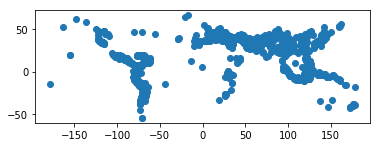

In [266]:
earthquakes_gdf.plot()

In [267]:
# Converting magnitude to numeric 
EQ2['Mag']=EQ2['Mag'].str.split(' ').str.get(0)
EQ2['Mag']
d_types= set([type(val) for val in EQ2['Mag']])
d_types
earthquake_df['magnitude'].dtype
earthquake_df.magnitude.values
earthquake_df.magnitude=earthquake_df.magnitude.astype(float).fillna(0.0)
earthquake_df.magnitude.values
earthquake_df['magnitude'].dtype


NameError: name 'earthquake_df' is not defined

In [268]:
countries_df = gpd.read_file('data/countries.geojson')
countries_df.head()

,ADMIN,ISO_A3,geometry
0,Aruba,ABW,POLYGON ((-69.99693762899992 12.57758209800004...
1,Afghanistan,AFG,"POLYGON ((71.04980228700009 38.40866445000009,..."
2,Angola,AGO,(POLYGON ((11.73751945100014 -16.6925779829998...
3,Anguilla,AIA,(POLYGON ((-63.03766842399995 18.2129580750000...
4,Albania,ALB,"POLYGON ((19.74776574700007 42.57890085900007,..."


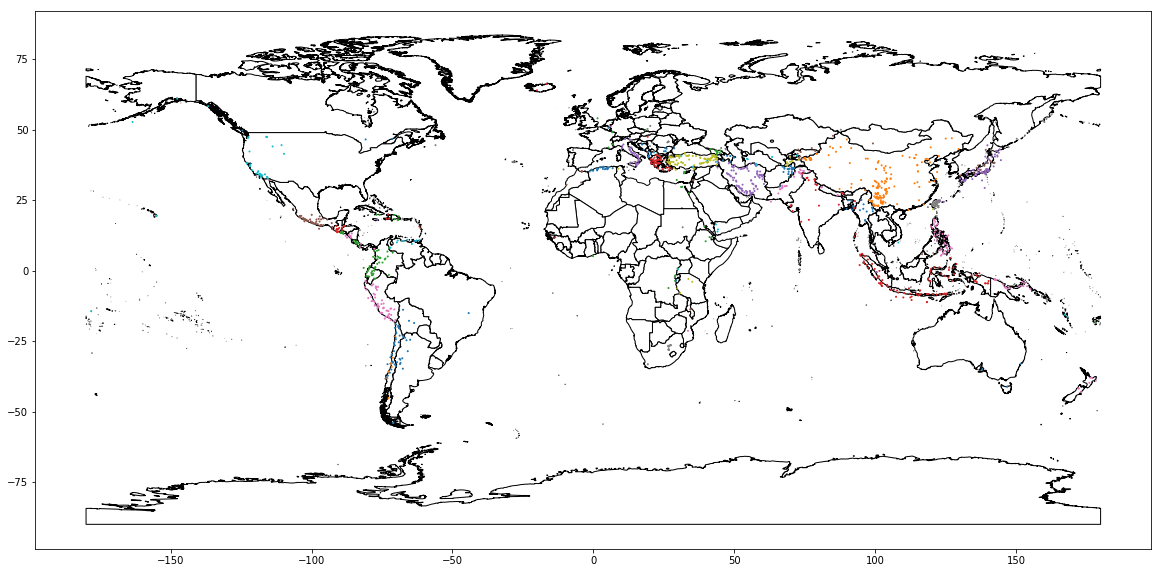

In [269]:
countries = countries_df.plot(color='white', edgecolor='black', figsize = (20, 20))

earthquakes_gdf.plot(ax=countries, markersize=1, figsize=(20, 20), column='Present-day country and link to Wikipedia article', label=True)